In [2]:
import numpy as np
import scipy.integrate as integrate
import time
import matplotlib.pyplot as plt

2. An experiment has measured $dN(t)/dt$, the number of particles entering a counter, per unit time, as a function of time. Your problem is to integrate this spectrum to obtain the number of particles $N(1)$ that entered the counter in the first second 
$$ N(1) = \int_0^1 e^{-t} dt$$
Compare the relative error for the composite trapezoid and Simpson rules. Try different values of N. Make a logarithmic plot of N vs Error.

### No entiendo, respecto al punto 1 si N es diferentes valores de particiones, o diferentes valores de N(t), número de partículas.

In [3]:
f = lambda t: np.exp(-t)

In [4]:
int_f = lambda a,b: -np.exp(-b)+np.exp(-a) #integral verdadera

In [75]:
### Composite Trapezoidal Rule
def TrapComp(f,a,b,n):
    h=(b-a)/np.float(n) #Espaciamiento

    sum = 0
    for i in range(1,n):
        sum+= f(a+h*i) 
    return h/2.*(f(a)+2.*sum+f(b))
    return sum

In [76]:
### Simpsons Composite Rule
def SimpComp(f,a,b,n):   # n par
    
    h = (b-a)/np.float(n) #Espaciamiento
    
    x_node = np.zeros(n+1) # Vector de nodos
    
    for i in range(n+1): 
        x_node[i] = a+ h*i
            
    #Integracion
    suma_impar = 0
    for i in range(1,int(n/2.)+1):
        suma_impar += f(x_node[2*i-1])
    
    suma_par = 0
    for i in range(1,int(n/2.)):
        suma_par+= f(x_node[2*i])

    return h/3.*(f(a)+2.*suma_par+4.*suma_impar+f(b))

In [77]:
def N1(t,n): # integral calculada de 0 a t, con Simpson Compuesta con n nodos, n par
    error = abs(int_f(0,t)-SimpComp(f,0,t,n))
    return (SimpComp(f,0,t,n), error)

def N2(t,n): # integral calculada de 0 a t, con Trapezoide Compuesta con n nodos
    error = abs(int_f(0,t)-TrapComp(f,0,t,n))
    return (TrapComp(f,0,t,n), error)

## Variando N como el número de particulas 

In [80]:
n=10 # Las particiones que hago son n*t para que cada integral se calcule sobre los mismos nodos igualmente espaciados
t_list=[i for i in range(1,10)] #Tiempo de 1 a 10 segundos, si se toma t mayores, se supera el épsilon de la máquina

N1_list = [N1(t,n*t+1)[0] for t in t_list] #Lista de integrales hechas con Simpson Compuesta
N1_error = [N1(t,n*t+1)[1] for t in t_list] #Errores absolutos 

N2_list = [N2(t,n*t)[0] for t in t_list] #Lista de integrales hechas con Trapecio Compuesta 
N2_error = [N2(t,n*t)[1] for t in t_list] #Errores absolutos

f_int_list = [int_f(0,t) for t in t_list] #Lista de los valores reales de la integral 

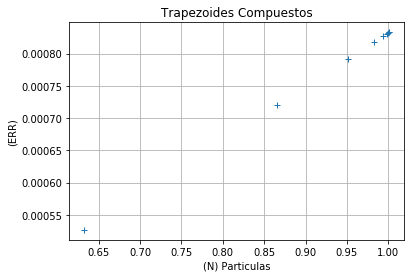

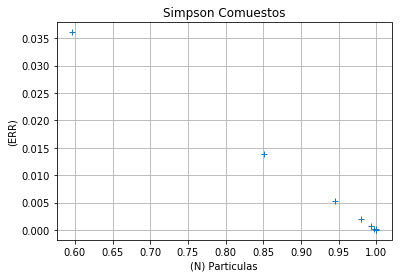

In [81]:
#Graficas
fig=plt.figure()
plt.subplot(1,2,1)
ax=plt.axes()
ax.grid()
ax.plot(N2_list,N2_error,'+')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('(N) Particulas')
plt.ylabel('(ERR)')
plt.title('Trapezoides Compuestos')
plt.show()

plt.subplot(1,2,2)
ax=plt.axes()
ax.grid()
ax.plot(N1_list,N1_error,'+')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('(N) Particulas')
plt.ylabel('(ERR)') 
plt.title('Simpson Comuestos')
plt.show('T1')

El error decrece linealmente con Simpson y crece linealmente con Trapecios

## Variando N como el número de particiones

In [82]:
#Tiempo de 0 a 1 segundos, variando el numero de pariciones de 1 a 100
n=100
n_list=[i for i in range(1,n+1)] 
N1_error_pares=[N1(1,n)[1] for n in range(2,n*2+2,2)] #Errores absolutos Simpson Compuesta, particiones pares

N2_error = [N2(1,n)[1] for n in n_list] #Errores absolutos

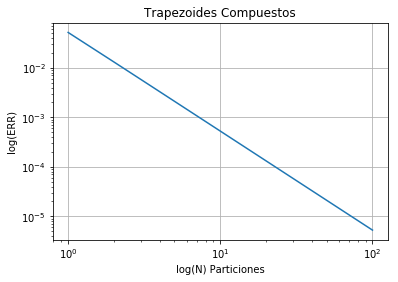

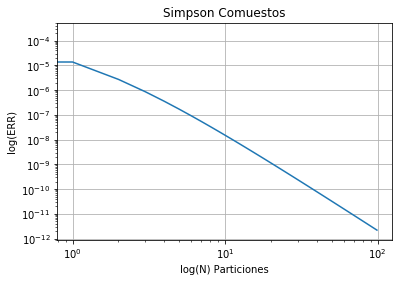

In [83]:
#Graficas
fig=plt.figure()
plt.subplot(1,2,1)
ax=plt.axes()
ax.grid()
ax.plot(n_list,N2_error)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('log(N) Particiones')
plt.ylabel('log(ERR)')
plt.title('Trapezoides Compuestos')
plt.show()

plt.subplot(1,2,2)
ax=plt.axes()
ax.grid()
ax.plot(n_list2,N1_error_pares)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('log(N) Particiones')
plt.ylabel('log(ERR)') 
plt.title('Simpson Comuestos')
plt.show('T1')

 Variando el número de particiones, el error decrece logaritmicamente con ambos métodos
 
El error es mayor con trapacios que con Simpson por un factor de $10^{-7}$ con 100 particiones